In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table

from jampy.jam_axi_proj import jam_axi_proj
from jampy.jam_axi_intr import jam_axi_intr

In [2]:
def jam_axi_proj_example():
    """
    Usage example for jam_axi_proj.
    It takes about 3s on a 3GHz CPU

    """
    np.random.seed(123)
    xbin, ybin = np.random.uniform(low=[-55, -40], high=[55, 40], size=[1000, 2]).T

    inc = 60.                                                # Assumed galaxy inclination
    r = np.sqrt(xbin**2 + (ybin/np.cos(np.radians(inc)))**2) # Radius in the plane of the disk
    a = 40                                                   # Scale length in arcsec
    vr = 2000*np.sqrt(r)/(r+a)                               # Assumed velocity profile (v_c of Hernquist 1990)
    vel = vr * np.sin(np.radians(inc))*xbin/r                # Projected velocity field
    sig = 8700/(r+a)                                         # Assumed velocity dispersion profile
    rms = np.sqrt(vel**2 + sig**2)                           # Vrms field in km/s

    surf = np.array([39483., 37158., 30646., 17759., 5955.1, 1203.5, 174.36, 21.105, 2.3599, 0.25493])
    sigma = np.array([0.153, 0.515, 1.58, 4.22, 10, 22.4, 48.8, 105, 227, 525])
    qObs = np.full_like(sigma, 0.57)

    distance = 16.5     # Assume Virgo distance in Mpc (Mei et al. 2007)
    mbh = 1e8           # Black hole mass in solar masses
    beta = np.full_like(surf, 0.2)

    surf_lum = surf_pot = surf    # Assume self-consistency
    sigma_lum = sigma_pot = sigma
    qobs_lum = qobs_pot = qObs

    sigmapsf = [0.6, 1.2]
    normpsf = [0.7, 0.3]
    pixsize = 0.8
    goodbins = r > 10  # Arbitrarily exclude the center to illustrate how to use goodbins

    # The model is similar but not identical to the adopted kinematics!
    m = jam_axi_proj(surf_lum, sigma_lum, qobs_lum, surf_pot, sigma_pot, qobs_pot,
                     inc, mbh, distance, xbin, ybin, plot=True, data=rms,
                     sigmapsf=sigmapsf, normpsf=normpsf, beta=beta, pixsize=pixsize,
                     moment='zz', goodbins=goodbins, align='cyl', ml=-1)
    plt.pause(1)

    # The velocity is fitted at the best fitting M/L, beta and
    # inclination determined at the previous stage

    surf_pot *= m.ml  # Scale the density by the best fitting M/L from the previous step

    m = jam_axi_proj(surf_lum, sigma_lum, qobs_lum, surf_pot, sigma_pot, qobs_pot,
                     inc, mbh, distance, xbin, ybin, plot=True, data=vel,
                     sigmapsf=sigmapsf, normpsf=normpsf, beta=beta, pixsize=pixsize,
                     moment='z', goodbins=goodbins, align='cyl')
    plt.pause(1)

/Users/alonakonst/.local/share/virtualenvs/Code-xJh5Zfm5/lib/python3.8/site-packages/jampy/jam_axi_intr.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  R, z, sigma_lum, sigma_pot = np.array([R, z, sigma_lum, sigma_pot])/scale


jam_axi_cyl_zz_proj elapsed time sec: 1.07
inc=60.0 beta=0.20 M/L=1.18 BH=1.18e+08 chi2/DOF=0.799
Total mass MGE: 6.604e+10


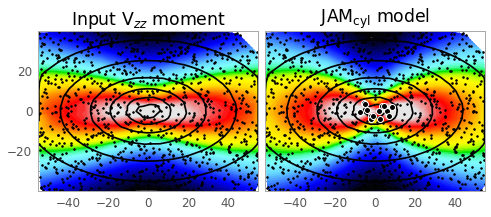

/Users/alonakonst/.local/share/virtualenvs/Code-xJh5Zfm5/lib/python3.8/site-packages/jampy/jam_axi_intr.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  R, z, sigma_lum, sigma_pot = np.array([R, z, sigma_lum, sigma_pot])/scale


jam_axi_cyl_z_proj elapsed time sec: 0.93
inc=60.0 kappa=0.86 beta=0.20 BH=1.00e+08 chi2/DOF=2.7
Total mass MGE 6.602e+10:


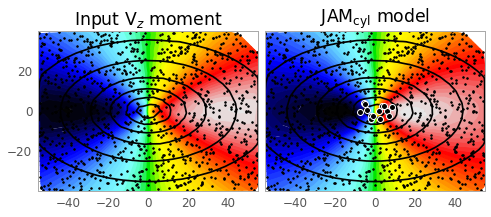

In [3]:
if __name__ == '__main__':

    jam_axi_proj_example()